In [1]:
from SCA_lean import Segmentation_Collision_Avoidance, Debug_Timer, Config, timeit
import numba_functs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import cv2
import time
import yaml
import glob
from ultralytics import FastSAM
from collections import defaultdict
from shapely.geometry import Point, Polygon
from numba import njit, prange
from timeit import default_timer as timer
from PIL import Image
from scipy import stats

run_name = "run0"

rgbImgs = sorted(glob.glob("/data/linden/npy_data/procd/" + run_name + "/rgb_*.npy"))
depthImgs = sorted(glob.glob("/data/linden/npy_data/procd/" + run_name + "/depth_*.npy"))

In [ ]:
sca = Segmentation_Collision_Avoidance("config")
sca.add_npy_file(rgbImgs[0], depthImgs[0], 0)
Debug_Timer.reset()
for i in range(50):
    # Debug_Timer.start("Loop")
    sca.add_npy_file(rgbImgs[i], depthImgs[i], 0)
    # Debug_Timer.stop("Loop")
# Debug_Timer.print_all()
Debug_Timer.print("consolidate_objects")
Debug_Timer.print("setup")
Debug_Timer.print("loop")
Debug_Timer.print("make_obj_list")
Debug_Timer.print("argsort")

consolidate_objects:
	total = 5.262974667362869, 50 samples
	avg = 0.10525949334725737, min = 0.004332674667239189, max = 0.18202015291899443
setup:
	total = 0.39389903098344803, 50 samples
	avg = 0.00787798061966896, min = 0.0009306007996201515, max = 0.01649068109691143
loop:
	total = 4.867954656481743, 50 samples
	avg = 0.09735909312963485, min = 0.0033868514001369476, max = 0.16550752986222506


Loop:
	total = 614.2260283296928, 778 samples
	avg = 0.7894936096782683, min = 0.11431681923568249, max = 1.1140195215120912
add_npy_file:
	total = 614.2212195806205, 778 samples
	avg = 0.7894874287668644, min = 0.11431074608117342, max = 1.114014563150704
receive_img:
	total = 601.5132154924795, 778 samples
	avg = 0.773153233280822, min = 0.09774764999747276, max = 1.097834024578333
frame init:
	total = 284.1584649961442, 778 samples
	avg = 0.3652422429256352, min = 0.023940379731357098, max = 0.5109891891479492
fit_least_squares:
	total = 195.04141319077462, 6672 samples
	avg = 0.02923282571804176, min = 0.02764894627034664, max = 0.04949090164154768
consolidate_objects:
	total = 159.5512516805902, 778 samples
	avg = 0.2050787296665684, min = 0.002156493254005909, max = 0.31028308626264334
fastSAM:
	total = 102.89809999987483, 778 samples
	avg = 0.13225976863737124, min = 0.06322426162660122, max = 0.20029479824006557
populate_objects:
	total = 64.92037313897163, 778 samples
	avg = 0.0834452096901949, min = 0.001096535474061966, max = 0.13860791269689798
filter_objects:
	total = 49.288209376856685, 778 samples
	avg = 0.06335245421189806, min = 0.010455943644046783, max = 0.10637223068624735
get_arcs_fit_lines:
	total = 19.242302998900414, 778 samples
	avg = 0.024733037273650917, min = 6.0519203543663025e-05, max = 0.046975878067314625
make_cartesian:
	total = 7.784825983457267, 778 samples
	avg = 0.010006203063569752, min = 0.008955108001828194, max = 0.013912073336541653
make_angle_path_circle:
	total = 2.8289532912895083, 1334400 samples
	avg = 2.1200189533044877e-06, min = 1.5702098608016968e-06, max = 0.00024276599287986755
arc_length:
	total = 0.5388254141435027, 173612 samples
	avg = 3.1036184949398815e-06, min = 2.123415470123291e-06, max = 1.998152583837509e-05
y_intercept:
	total = 0.06394406873732805, 26688 samples
	avg = 2.395985789018587e-06, min = 1.7397105693817139e-06, max = 1.866556704044342e-05
make_safety_box:
	total = 0.0605657584965229, 6672 samples
	avg = 9.077601693123936e-06, min = 5.585141479969025e-06, max = 3.667455166578293e-05
find_best_steering_angle:
	total = 0.03505516331642866, 778 samples
	avg = 4.505805053525535e-05, min = 3.458745777606964e-05, max = 7.277727127075195e-05

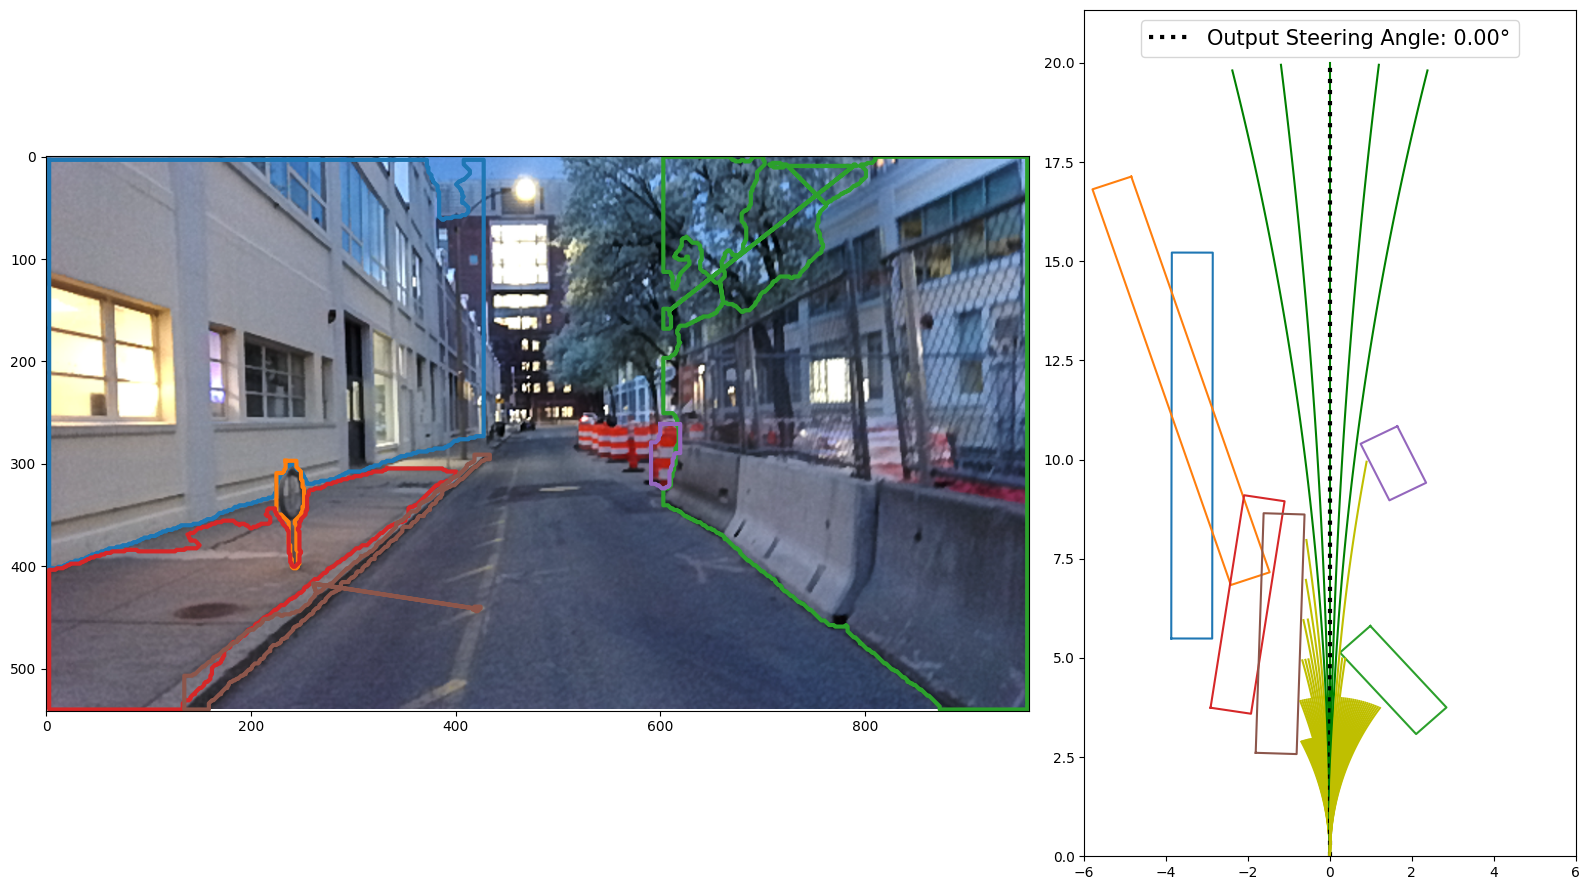

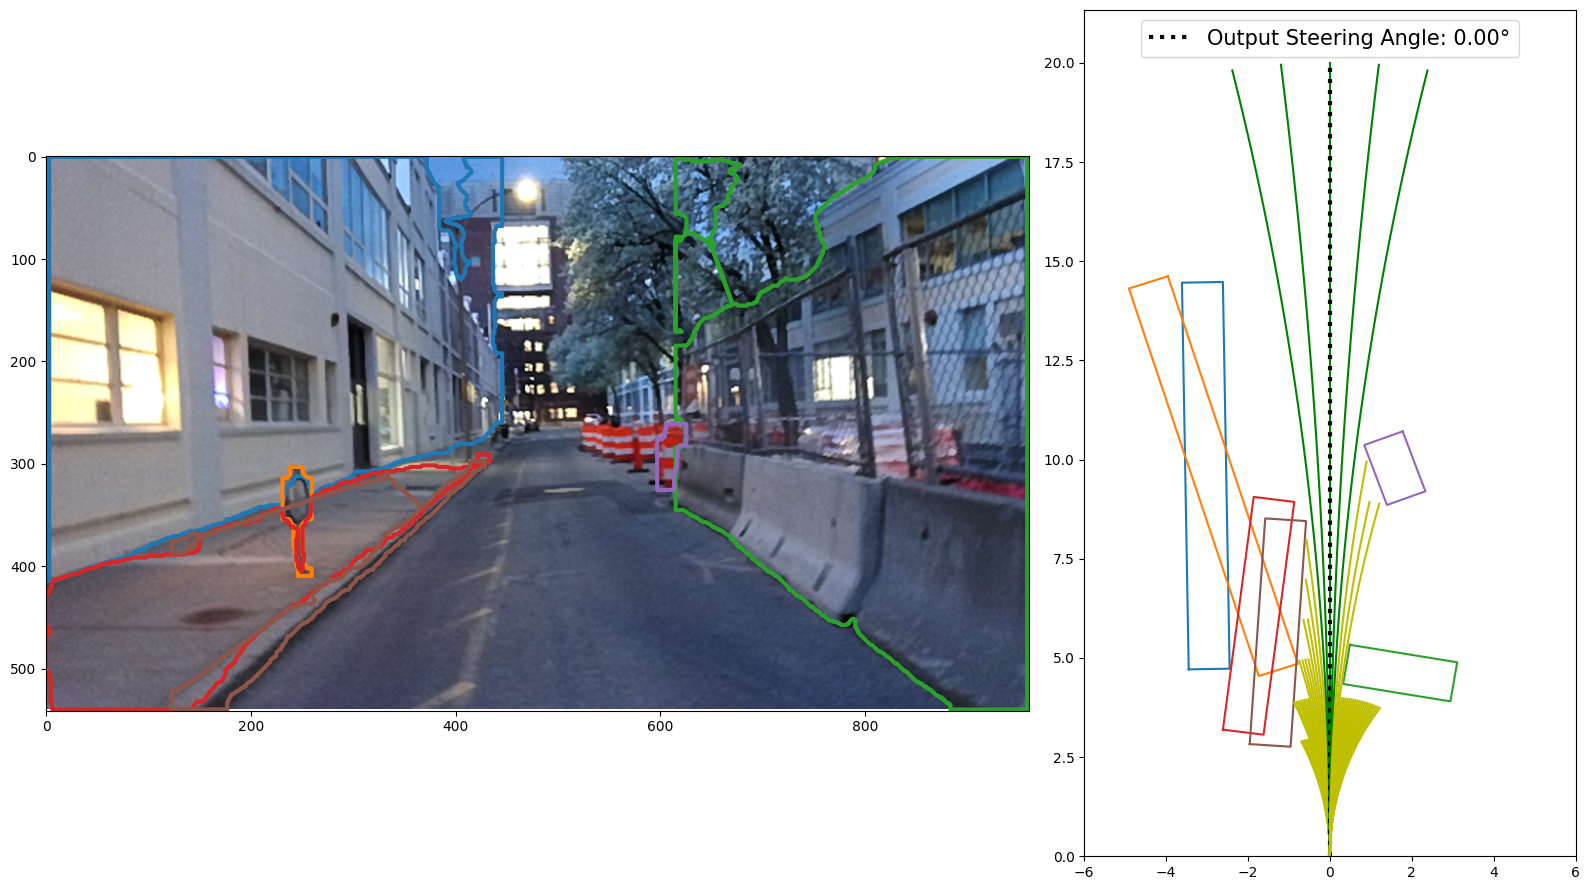

In [10]:
idx = 60

sca = Segmentation_Collision_Avoidance("config")
for i in range(2):
    sca.add_npy_file(rgbImgs[i + idx], depthImgs[i + idx], 0)
    fig = sca.plot()